In [19]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# 1. General Information About the Algorithm:

*This algorithm allows us to cluster and label data as an unsupervised machine learning algorithm

*We apply this algorithm for unlabeled data and it attempts to group similar clusters in unlabeled data.

*Types of clustering problems that we can apply this algorithm is:

        -Clustering Similar Documents
        -Cluster Customers based on their Features
        -Market Segmentation
        -Identify Similar Physical Groups
        
*The overall goal is to divide data into distinct groups such that observations within each group are similar

# 2.How does the algorithm work:

    -Choose a number of Clusters K
    -Randomly assign each point to a specific cluster
    -Until clusters stop changing, repeat the following steps:
        -For each cluster, compute the cluster's centroid by taking the mean vector points in the cluster
        -Assign each data point to the cluster for which the centroid is the closest
    


*2.1. Here is the visualization how the algorithm works:

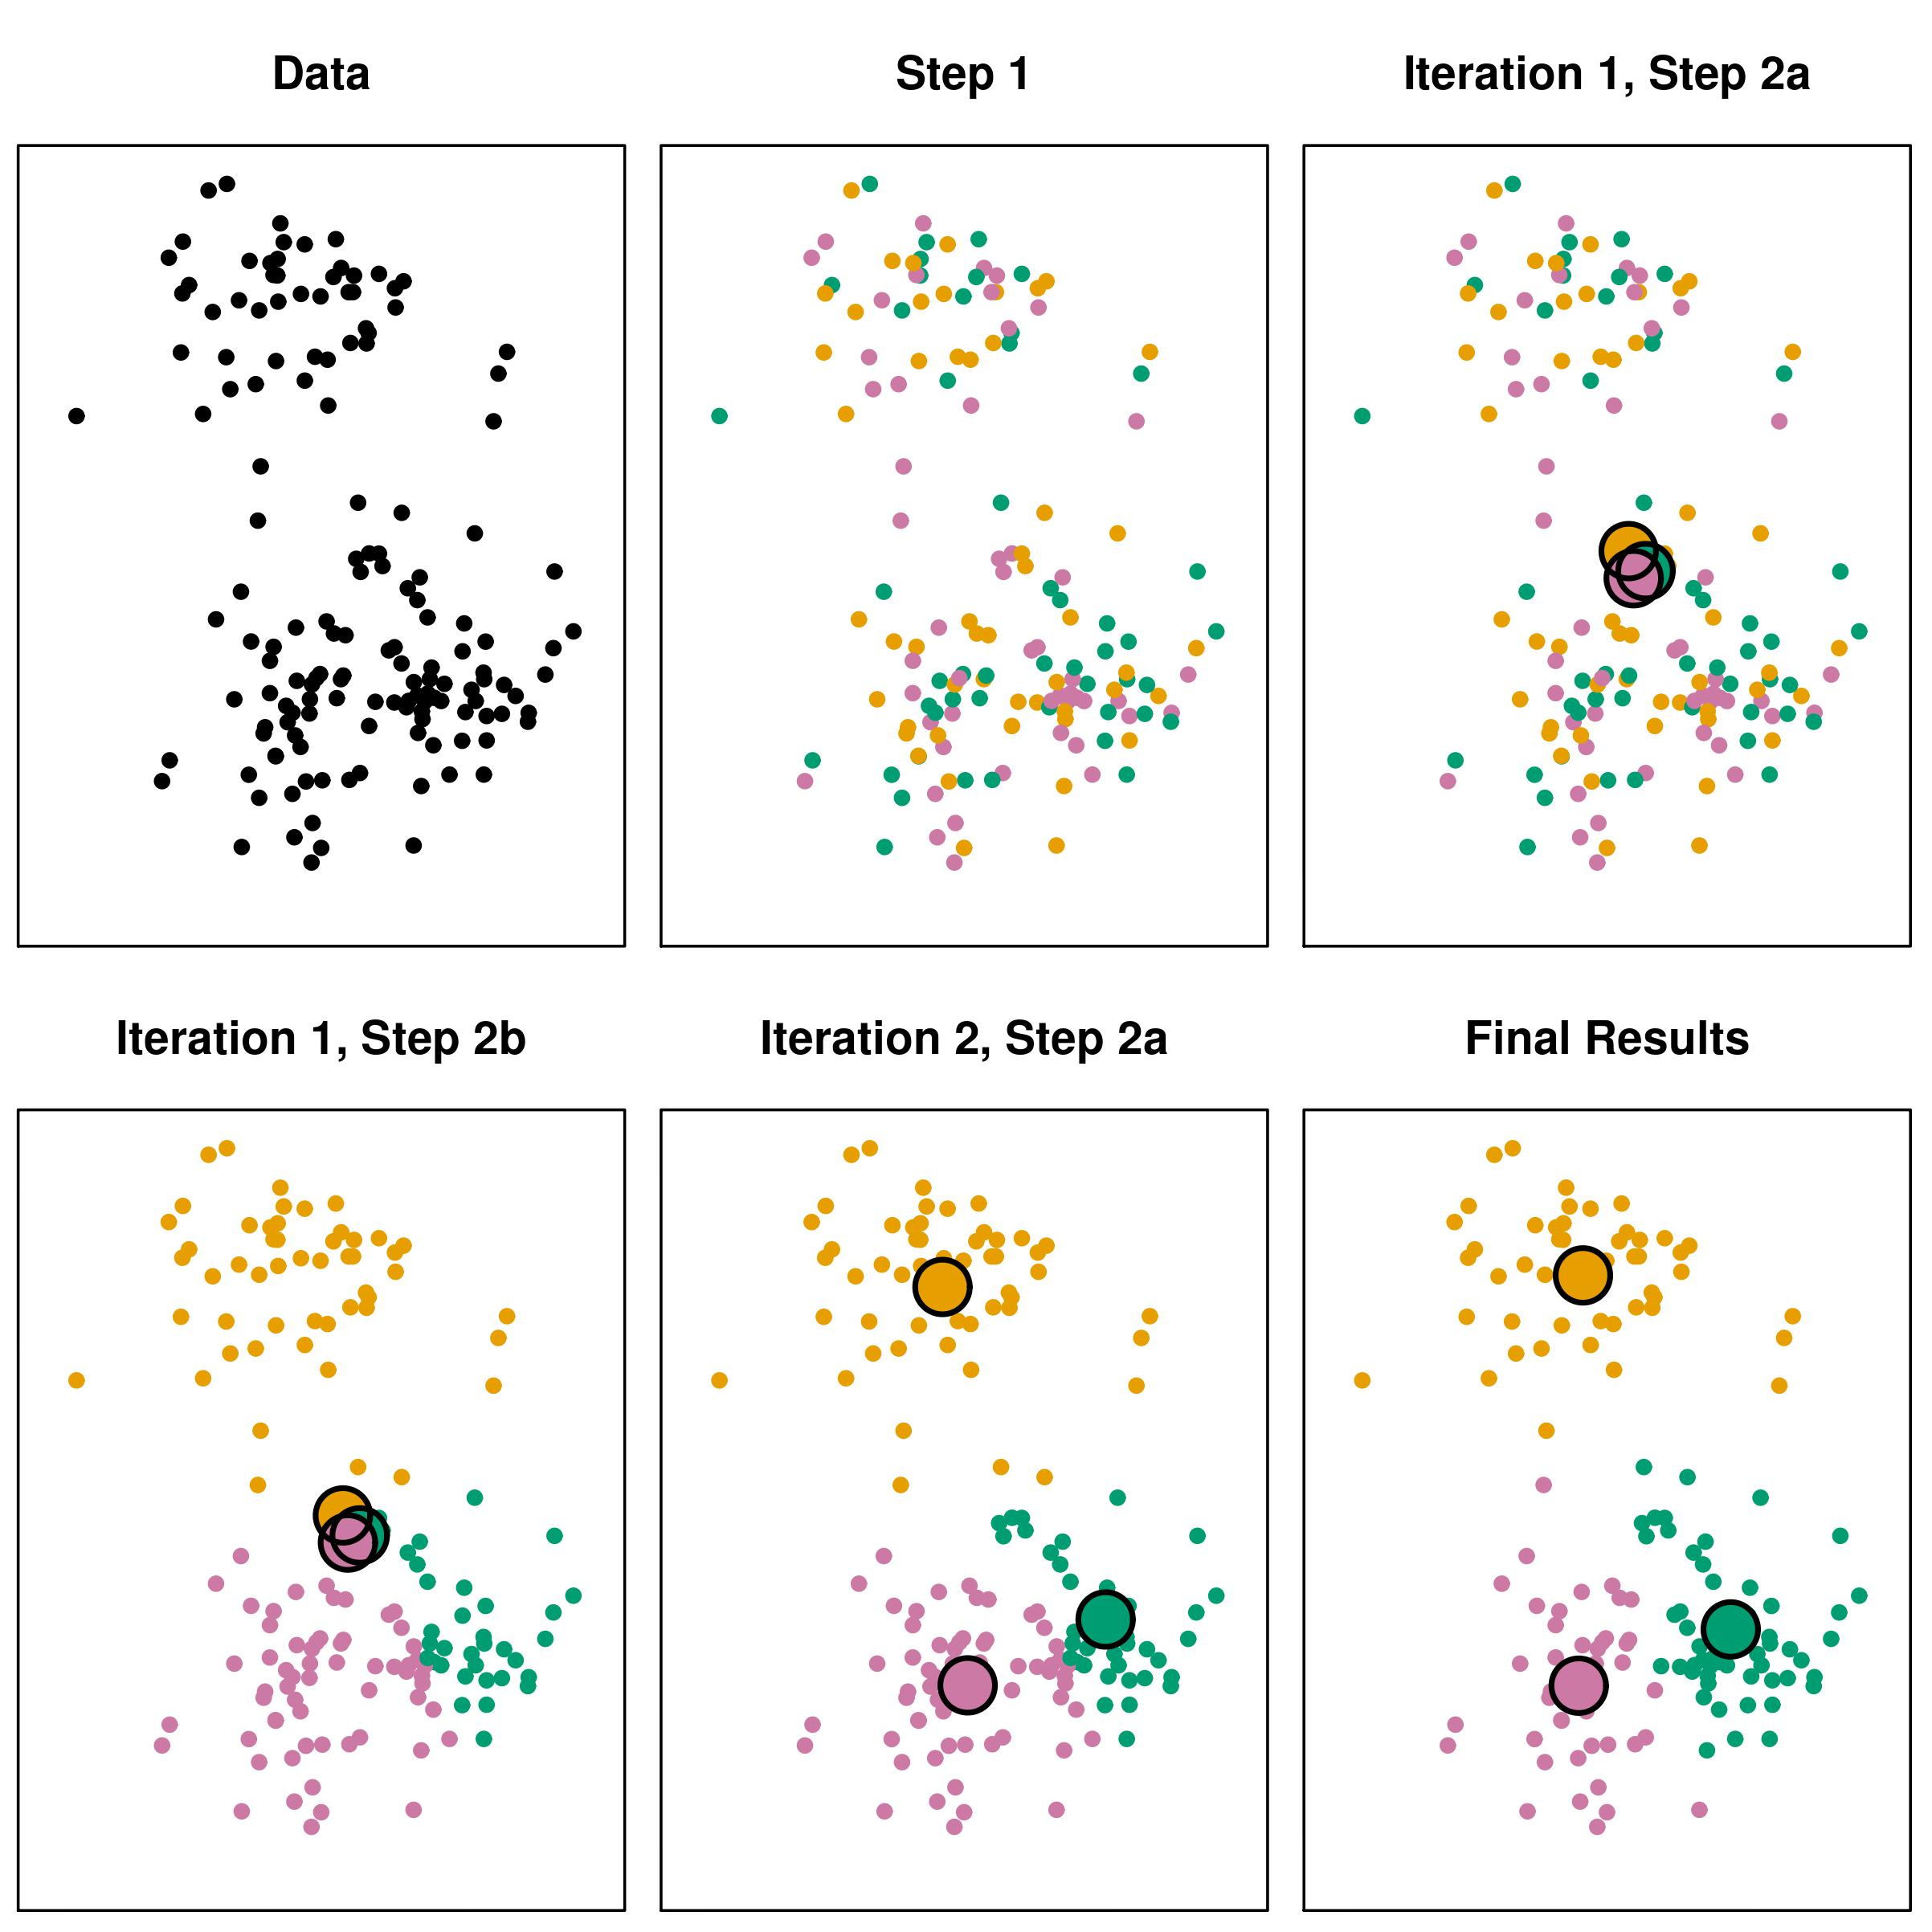

In [20]:
from IPython.display import Image
url="https://i.stack.imgur.com/FQhxk.jpg"
Image(url,width=800, height=800)

* The first observation about data is shown in top-left of the figure above.

* In the step 1 in the algorithm, each observation is randomly assigned to a cluster.

* In the step 2a in the algorithm,the cluster centroid for each cluster is computed, which are shown as large colored disk as shown top-right of the figure.

* Initially these centroids are almost overlapping as we can see from the figure because initial cluster assignments are chosen randomly.

* In the step 2a in the algorithm(bottom-left of the figure above), each observation is assigned to the neares centroid.

* In bottom-center of the figure above, step 2a once again is performed which lead to new cluster centroids.

* We basically keep repeating these steps until there is no new cluster which means data points are being reassigned to a new cluster centroid.

* At the bottom-right, we have the results obtained after about 10 iterations


*2.2. How to choose a K Value for the Algorithm:

* To perform K Mean Clustering, we have to decide how many clusters we expect in the data.

* There is no easy answer for choosing a best K Value, but we can use elbow method to achieve a good K Value for the algorithm.

* The basic idea behind this method is that it plots the various values of cost with changing k. As the value of K increases, there will be fewer elements in the cluster. So average distortion will decrease. The lesser number of elements means closer to the centroid. So, the point where this distortion declines the most is the elbow point.

* First of all, we compute the sum of squared errors(SSE) for some values of K(example, 2,3,4,6,etc).The SSE is the sum of squared distance between each member of the cluster and its centroid.

* If we plot K value against the SSE,the error decreases as the K Value increases because if the number of cluster increases, they should be smaller. Accordingly the distortion becomes also smaller.

* From this perspective, the idea of using elbow method is to choose K Value at which SSE decreases abruptly, and this produces an elbow effect as we can see in the following picture.

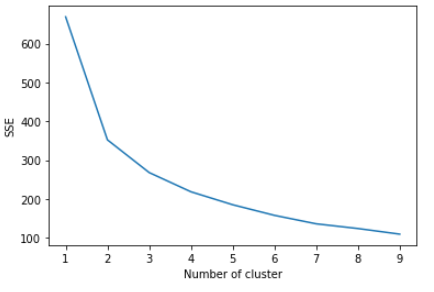

In [21]:
url="https://i.stack.imgur.com/vc01j.png"
Image(url,width=800, height=800)

* In the plot above, we see the number of cluster on the x-axis and within group sum o squares.

* We try to choose a K Value where we won't get much information by increasing the number of classes, which means that we will not significantly within groups sum of squares by increase the number of clusters.

* The number 2 or 3 is the most ideal in this plot because it is the first point the elbow shape happens and avoid to increase the number clusters more.

# 3. Importing Data and Required Libraries

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cufflinks as cf
cf.go_offline()
import seaborn as sns

* In this data set we are not going to predict any outcome as it is case in supervised learning algorithms.What we are going to do is to find patterns in the data via K Means Clustering Algorithm

* We will create artificial data to anaylze with K Means Clustering Algorithm

In [23]:
from sklearn.datasets import make_blobs
#This is the we will use to create artificial dataset

* make_blobs(n_samples=100, n_features=2, *, centers=None, cluster_std=1.0, center_box=(-10.0, 10.0), shuffle=True,   random_state=None, return_centers=False)
    Generate isotropic Gaussian blobs for clustering.

* This basically allows to create artificial data we can play with
    

In [24]:
data=make_blobs(n_samples=200, n_features=2,centers=4, cluster_std=1.8,random_state=101)
data

(array([[-6.42884095e+00,  1.01411174e+01],
        [ 5.86867888e+00,  5.20110356e+00],
        [-3.76109375e-01,  3.26427943e+00],
        [ 2.16679181e+00,  9.56300522e+00],
        [ 5.09508570e+00,  7.20752718e+00],
        [-1.08788882e+01, -6.11318040e+00],
        [ 2.03405554e+00,  9.76664755e+00],
        [-1.71798771e+00,  1.41401140e+00],
        [ 1.16911341e+00,  8.24556988e+00],
        [-1.35185444e+00,  3.13245345e+00],
        [-6.18548214e+00,  9.67406555e+00],
        [-1.19856602e+00,  2.50408937e+00],
        [ 2.90296863e+00,  7.91251003e+00],
        [ 2.39250023e+00,  5.38173971e+00],
        [-5.27545147e+00,  9.63836659e+00],
        [-5.66814687e-01,  5.60262755e-02],
        [ 5.97336628e+00,  5.87172022e+00],
        [-2.31355268e+00,  5.23980092e-01],
        [-1.01344756e+01, -3.43130837e+00],
        [-4.54082629e+00,  1.13920174e+01],
        [-1.04155833e+01, -5.67545836e+00],
        [ 6.64796693e-01,  9.42304718e-02],
        [ 2.11460477e+00,  3.559

* The data is just a tuple which contains numpy array consisting of feature and columns we we have assigned before

In [25]:
data[0].shape # The data contains 200 rows and 2 columns

(200, 2)

* If we visualize the data we can get better insights about the data

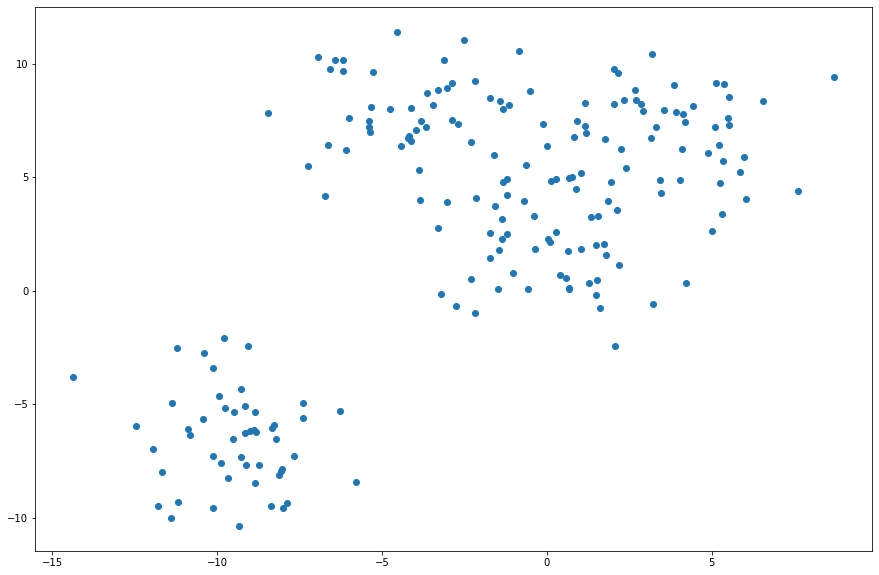

In [26]:
plt.figure(figsize=(15,10))
plt.scatter(data[0][:,0], data[0][:,1]) # Here we visualize both of the columns
#this data represents the two blobs we have assigned 

In [27]:
data[1] #This data represents the four clusters we have created with the centers parameter

array([3, 2, 0, 2, 2, 1, 2, 0, 2, 0, 3, 0, 2, 2, 3, 0, 2, 0, 1, 3, 1, 0,
       0, 1, 3, 1, 1, 0, 2, 2, 3, 1, 2, 0, 0, 3, 1, 1, 1, 2, 1, 3, 3, 3,
       0, 3, 3, 0, 1, 2, 0, 3, 2, 0, 1, 3, 0, 0, 3, 2, 1, 2, 1, 3, 2, 0,
       1, 2, 2, 1, 2, 0, 1, 3, 1, 2, 2, 0, 3, 0, 0, 1, 2, 1, 0, 0, 0, 3,
       2, 1, 1, 1, 1, 3, 0, 1, 2, 3, 1, 2, 0, 1, 0, 0, 2, 0, 1, 2, 1, 1,
       0, 3, 3, 2, 1, 2, 3, 3, 2, 3, 0, 3, 0, 3, 0, 2, 3, 0, 1, 3, 3, 3,
       0, 1, 1, 3, 2, 3, 2, 0, 1, 2, 1, 3, 3, 2, 0, 1, 3, 3, 3, 3, 0, 2,
       0, 3, 2, 2, 2, 0, 2, 0, 0, 3, 1, 3, 0, 2, 3, 0, 2, 0, 3, 3, 0, 3,
       2, 2, 1, 2, 3, 1, 1, 3, 1, 1, 1, 1, 1, 0, 1, 2, 2, 3, 1, 0, 2, 2,
       1, 0])

* Here we will also add the cluster in the previous scatterplot

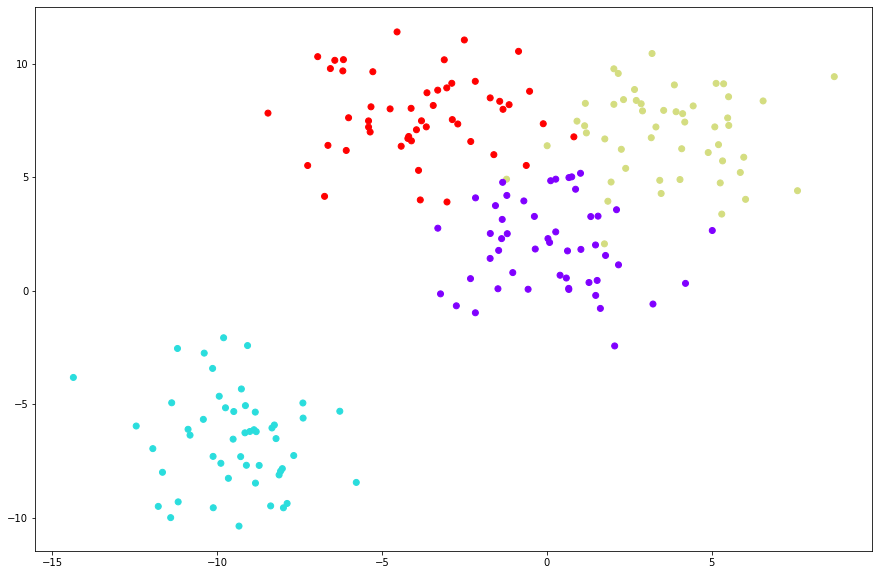

In [28]:
plt.figure(figsize=(15,10))
plt.scatter(data[0][:,0], data[0][:,1],c=data[1],cmap="rainbow")

# 4. Implementing the Algorithm:

In [29]:
from sklearn.cluster import KMeans

* This algorithm is unsupervised and will start to randomly assign each observation to a cluster and then find centroid for each cluster.

* The algorithm will iterate through the two steps by repeating them over and over again until the cluster variation can't be reduced any further:
    -reassign data points to to the cluster whose centroid is closest.
    -calculate the new centroid for each cluster

In [35]:
kmeans=KMeans(n_clusters=4) #Here I assign 4 because I know that it s 4 in my artificial dataset 
kmeans.fit(data[0]) #The algorithm will fit the features of the data

KMeans(n_clusters=4)

In [36]:
kmeans.cluster_centers_
#This atrribute returns the centers of the four clusters

array([[-0.0123077 ,  2.13407664],
       [-9.46941837, -6.56081545],
       [ 3.71749226,  7.01388735],
       [-4.13591321,  7.95389851]])

In [38]:
kmeans.labels_
#This returns the labels that algorithm find as True

array([3, 2, 0, 2, 2, 1, 2, 0, 2, 0, 3, 0, 2, 2, 3, 0, 2, 0, 1, 3, 1, 0,
       0, 1, 3, 1, 1, 0, 2, 2, 3, 1, 2, 0, 0, 3, 1, 1, 1, 0, 1, 3, 3, 3,
       0, 2, 3, 0, 1, 0, 0, 3, 2, 0, 1, 3, 0, 0, 3, 2, 1, 2, 1, 3, 2, 0,
       1, 2, 2, 1, 2, 0, 1, 0, 1, 2, 2, 0, 3, 0, 0, 1, 2, 1, 0, 0, 0, 3,
       0, 1, 1, 1, 1, 0, 0, 1, 2, 3, 1, 2, 0, 1, 0, 0, 2, 0, 1, 2, 1, 1,
       2, 3, 3, 2, 1, 2, 3, 3, 2, 3, 0, 3, 0, 3, 0, 2, 3, 0, 1, 3, 3, 3,
       0, 1, 1, 3, 2, 3, 2, 0, 1, 2, 1, 3, 3, 2, 0, 1, 3, 3, 3, 3, 0, 2,
       0, 3, 2, 2, 2, 0, 2, 0, 0, 3, 1, 3, 0, 2, 3, 0, 2, 0, 3, 2, 0, 3,
       2, 2, 1, 2, 3, 1, 1, 3, 1, 1, 1, 1, 1, 0, 1, 2, 2, 3, 1, 0, 2, 2,
       1, 0], dtype=int32)

* Because I know actual labels for this artificial data, I can compare the results between what the algorithm finds and 

subplots(nrows=1, ncols=1, sharex=False, sharey=False, squeeze=True, subplot_kw=None, gridspec_kw=None, **fig_kw)
    
    Create a figure and a set of subplots.

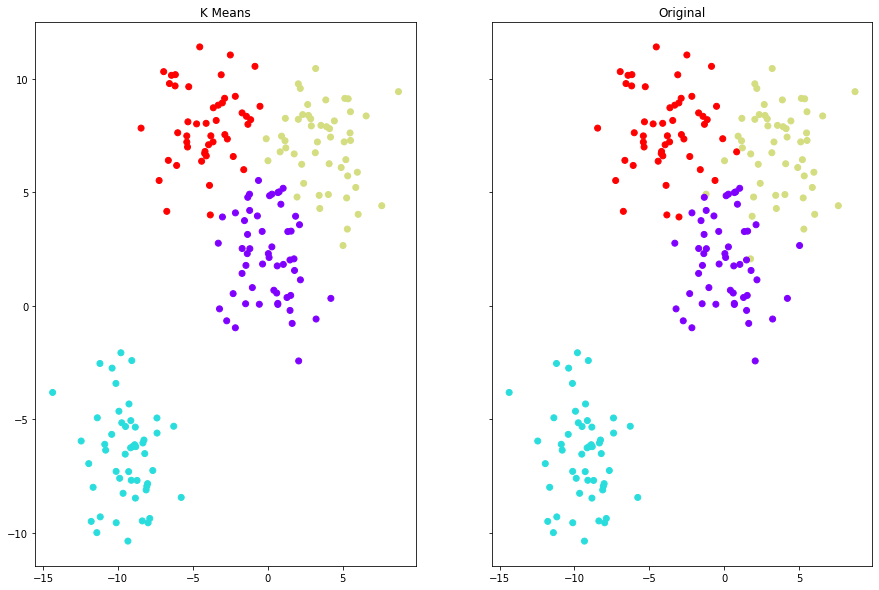

In [46]:
fig,(ax1,ax2)=plt.subplots(1,2,sharey=True,figsize=(15,10))
ax1.set_title("K Means")
ax1.scatter(data[0][:,0], data[0][:,1],c=kmeans.labels_,cmap="rainbow")
#Here we color the scatter plot according to the kmeans' labels

ax2.set_title("Original")
ax2.scatter(data[0][:,0], data[0][:,1],c=data[1],cmap="rainbow")
#Here we color the scatter plot according to the original labels

* As we can see from the figures above, there is some differences between the original values and KMeans' clustering